<h3> NBA 5 year careeer prediction using XBoost Classifier

In [1]:
import pandas as pd
import numpy as np

<h4> 1. Load processed sets

<h5> Loading scaled training, validation and test sets from data_prep step saved on the data/processed folder saving them into X_train, X_val, y_train, y_val, X_test, X_test_ID variables

In [2]:
#Load Test and validation sets using custom function load_sets
from src.data.sets import load_sets

In [3]:
X_train, X_val, y_train, y_val, X_test, X_test_ID = load_sets()

<h4> 2. Import Random Forest

<h5> Importing and fitting Random Forest Classifier with 300 estimators

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
# calculating weights for unbalanced data 
sum_wpos = len([item for item in y_train if item==1 ])
sum_wneg = len([item for item in y_train if item==0 ])
sum_wneg/sum_wpos

0.23921832884097036

<h4> 2.1 Analyse features importance in random forest model with current training sets

In [6]:
rf_model = RandomForestClassifier(n_estimators = 300, random_state=44)

In [7]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(rf_model
                     # , threshold = "0.98*mean"
                     )
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=300,
                                                 random_state=44))

<h4> 2.2 Finding the most relevant features in making predictions

<h5> After the model has been fitted, we use get.support to find out which features are most relevant in the predictions

In [8]:
columns = sel.get_support()
columns = columns.tolist()

<h5> As column importance is given in order of appearance on the scaled set, importing column names saved in data_prep for easy visualization and identification will be performed

<h5> Importing predictor column names and combining with relevant columns to find out the best feature predictors

In [9]:
predictors  = pd.read_csv('../data/interim/predictor_names.csv')

In [10]:
predictors_df = predictors.copy()

In [11]:
predictors = predictors['names'].tolist()

In [12]:
predictors_df['Relevant_Feature'] = columns

In [13]:
print(predictors_df)

         names  Relevant_Feature
0           GP              True
1          MIN              True
2          PTS              True
3          FGM              True
4          FGA             False
5          FG%              True
6      3P Made             False
7          3PA             False
8          3P%              True
9          FTM             False
10         FTA             False
11         FT%              True
12        OREB             False
13        DREB             False
14         REB             False
15         AST             False
16         STL             False
17         BLK             False
18         TOV             False
19   3P_per_GP             False
20  Stl_per_GP              True
21        ORtg              True
22         PPP              True
23         TSP              True
24  Reb_per_GP              True
25  Min_per_GP              True
26  Blk_per_GP             False


In [14]:
print(predictors_df.loc[predictors_df['Relevant_Feature'] == 1])

         names  Relevant_Feature
0           GP              True
1          MIN              True
2          PTS              True
3          FGM              True
5          FG%              True
8          3P%              True
11         FT%              True
20  Stl_per_GP              True
21        ORtg              True
22         PPP              True
23         TSP              True
24  Reb_per_GP              True
25  Min_per_GP              True


<h5> <b>CONCLUSION ON PREDICTORS: </b> Based on the rebalanced training set from data_prep, 6 features are the most relevant predictors. Therefore new data prep will be generated for usage of these columns within the model

<h4> 2.3 New data prep to be performed and data sets saved in the ../data/interim folder

<h5> 2.3.1 Get a list of column names to be removed from data set

In [15]:
columns_to_remove_df = predictors_df.loc[predictors_df['Relevant_Feature'] == 0]

In [16]:
columns_to_remove = columns_to_remove_df.pop("names")

In [17]:
columns_to_remove_list = columns_to_remove.values.tolist()

<h5> 2.3.2 Read csvs and remove unwanted columns

In [18]:
# Remove columns with low predictor power training set

In [19]:
#df_cleaned.drop(columns=columns_to_remove_list, axis=1, inplace=True)

In [20]:
#Replace negatives with 0s as there can't be negative values

In [21]:
#Remove unwanted columns based on previous experiments

<h5> Finally, all cleaned and transfor sets will be saved in the data/interim folder using a custom function saved in the src folder

In [22]:
#from src.data.sets import save_sets_interim

In [23]:
#save_sets_interim(X_train, X_val, y_train, y_val, X_test, X_test_ID)

<h4> 3 Train XGB Classifier with new calculated training sets

<h5> Next up, the XGB classifier will be imported and trained with the new training set and saved into the models folder

In [24]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=44)

<h5> After the model has been fitted, it will be saved in the models folder in case it needs to be re-called on a later process

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
#Save model in the models folder
#from joblib import dump
#dump(rf_model, '../models/RF3.joblib')

<h4> 3.1 Generate predictions for training and validation sets in order to compare accuracy vs Baseline

<h5> The fitted model will be used to predict the validation set and accuracy willl be calculated to compare vs the baseline

In [27]:
y_val_preds = rf_model.predict(X_val)

In [28]:
y_trainpreds = rf_model.predict(X_train)

<h4> 3.2 Calculate mse and mae to assess fiting accuracy for the training and validation sets

In [29]:
#Get error/score metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [30]:
rf_model.score(X_train, y_train)

1.0

In [31]:
rf_model.score(X_val, y_val)

0.815625

<h5> The training model shows a perfect fit, however the model score drops to 0.80 on the validation set

<h4> 3 Analysis of the validation set

<h5> Analysis of the results will be done through a confusion matrix to gather insights as to where the accuracy/innacuracy exists in order to improve the model in future experiments <br> <br> We'll look into a confusion matrix to see the distribution of the predictions from the model

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

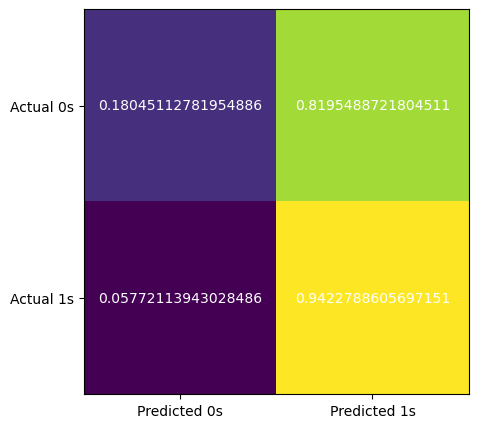

In [33]:
cm = confusion_matrix(y_val, y_val_preds , normalize='true'
                     )

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

<h5> As seen in the confusion matrix, 92% of true positive target was predicted correctly, however, 81% of negative target was predicted incorrectly (false positive)

In [34]:
import scikitplot as skplt
import matplotlib.pyplot as plt

In [35]:
y_val_prob = rf_model.predict_proba(X_val)

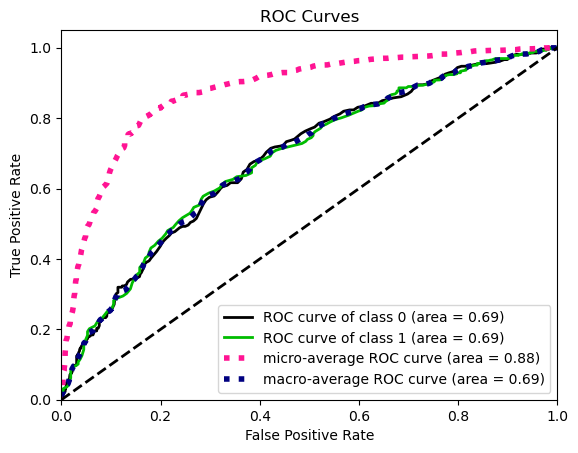

In [36]:
skplt.metrics.plot_roc(y_val, y_val_prob)
plt.show()

<h5> When analysing the results on the validation set, the AUROC is 0.68, meaning the model is predicting only 69% of the instances correctly

In [37]:
#Analyse lines that are not predicted correctly

In [38]:
#Filter Predicted 1 actual 0

In [39]:
X_val_df = pd. DataFrame(X_val, columns = predictors)

In [40]:
y_val_list = y_val.tolist()
X_val_df['y_val']=y_val_list

In [41]:
X_val_df['y_val_preds']=y_val_preds

In [42]:
#Filter observations for Actual=0 but prediction = 1

In [43]:
#True Negatives
X_val_true_neg = X_val_df[(X_val_df['y_val']==0)&(X_val_df['y_val_preds']==0)]
X_val_true_neg.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,3P_per_GP,Stl_per_GP,ORtg,PPP,TSP,Reb_per_GP,Min_per_GP,Blk_per_GP,y_val,y_val_preds
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.0
mean,33.812500,9.493750,2.845833,1.089583,2.997917,37.02500,0.256250,0.781250,22.356250,0.506250,...,0.008223,0.012709,70.658398,0.706584,0.427254,0.038522,0.312328,0.002900,0.0,0.0
std,11.447672,4.575485,1.666307,0.624411,1.709733,4.14916,0.315491,0.865818,18.193673,0.378916,...,0.010562,0.008710,8.425594,0.084256,0.037523,0.025015,0.176699,0.004574,0.0,0.0
min,4.000000,2.900000,0.800000,0.300000,0.800000,27.50000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.002564,44.426494,0.444265,0.333333,0.006383,0.082979,0.000000,0.0,0.0
25%,28.750000,6.100000,1.500000,0.575000,1.500000,33.60000,0.000000,0.000000,9.550000,0.200000,...,0.000000,0.006531,65.552834,0.655528,0.406624,0.020378,0.218262,0.000000,0.0,0.0
50%,35.500000,8.700000,2.600000,1.000000,2.750000,37.85000,0.100000,0.500000,17.150000,0.500000,...,0.003137,0.010614,70.663338,0.706633,0.427102,0.030851,0.259838,0.000000,0.0,0.0
75%,41.000000,12.300000,3.700000,1.325000,3.925000,40.10000,0.500000,1.350000,34.225000,0.625000,...,0.013607,0.016128,75.716408,0.757164,0.450450,0.054511,0.376896,0.004941,0.0,0.0
max,61.000000,24.000000,7.400000,2.700000,7.500000,44.30000,1.100000,3.000000,65.500000,1.900000,...,0.038462,0.043750,89.113680,0.891137,0.515777,0.100000,0.950000,0.025000,0.0,0.0


In [44]:
#False Positive
X_val_false_pos = X_val_df[(X_val_df['y_val']==0)&(X_val_df['y_val_preds']==1)]
X_val_false_pos.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,3P_per_GP,Stl_per_GP,ORtg,PPP,TSP,Reb_per_GP,Min_per_GP,Blk_per_GP,y_val,y_val_preds
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.0,218.0
mean,57.091743,15.449541,5.825688,2.242202,5.198165,43.191743,0.318807,0.956422,22.327523,1.077064,...,0.005594,0.009596,83.835000,0.838350,0.496996,0.046610,0.273520,0.004575,0.0,1.0
std,13.986195,6.494076,2.929617,1.151540,2.591549,5.665200,0.274684,0.800910,15.225254,0.674094,...,0.004892,0.005490,10.728494,0.107285,0.054072,0.030298,0.100591,0.009044,0.0,0.0
min,11.000000,4.600000,1.200000,0.400000,1.100000,31.100000,0.000000,0.000000,0.000000,0.100000,...,0.000000,0.000000,59.491617,0.594916,0.372671,0.006154,0.096053,0.000000,0.0,1.0
25%,48.000000,10.850000,3.800000,1.400000,3.300000,39.625000,0.100000,0.200000,10.450000,0.600000,...,0.001277,0.005195,76.776559,0.767766,0.460260,0.024034,0.202078,0.000000,0.0,1.0
50%,56.000000,14.250000,5.400000,2.000000,4.700000,43.050000,0.300000,0.900000,21.700000,0.900000,...,0.005357,0.009339,82.916067,0.829161,0.493014,0.038434,0.255409,0.003175,0.0,1.0
75%,66.000000,19.000000,7.575000,2.800000,6.500000,46.700000,0.500000,1.400000,31.475000,1.375000,...,0.008608,0.012500,90.869965,0.908700,0.531021,0.062416,0.330471,0.005920,0.0,1.0
max,93.000000,38.100000,15.800000,6.200000,14.800000,58.100000,1.400000,3.900000,73.700000,4.200000,...,0.026415,0.032609,128.406709,1.284067,0.717213,0.186842,0.656897,0.118182,0.0,1.0


In [45]:
# True Positives
X_val_true_pos = X_val_df[(X_val_df['y_val']==1)&(X_val_df['y_val_preds']==1)]
X_val_true_pos.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,3P_per_GP,Stl_per_GP,ORtg,PPP,TSP,Reb_per_GP,Min_per_GP,Blk_per_GP,y_val,y_val_preds
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,...,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.0,1257.0
mean,65.918059,19.596818,7.748449,2.992522,6.576531,45.424105,0.326730,0.966348,20.375259,1.502944,...,0.005120,0.010468,87.066069,0.870661,0.514516,0.052711,0.297727,0.005257,1.0,1.0
std,15.700231,8.881867,4.301551,1.695082,3.617575,5.973530,0.307188,0.879629,14.459980,0.910457,...,0.005056,0.005945,10.019281,0.100193,0.052223,0.028589,0.111993,0.009673,0.0,0.0
min,18.000000,4.000000,1.000000,0.400000,1.100000,27.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,58.459422,0.584594,0.355450,0.007143,0.085106,0.000000,1.0,1.0
25%,55.000000,13.100000,4.500000,1.800000,3.900000,41.400000,0.000000,0.100000,8.500000,0.800000,...,0.000000,0.006329,80.268535,0.802685,0.479904,0.031034,0.213559,0.001667,1.0,1.0
50%,65.000000,17.600000,6.900000,2.600000,5.700000,45.300000,0.300000,0.900000,19.000000,1.300000,...,0.004301,0.009231,86.830680,0.868307,0.513060,0.047826,0.281967,0.003636,1.0,1.0
75%,76.000000,24.600000,10.000000,3.800000,8.400000,49.400000,0.500000,1.600000,30.800000,2.000000,...,0.008197,0.013333,93.521898,0.935219,0.547014,0.066667,0.363636,0.006250,1.0,1.0
max,115.000000,59.400000,30.300000,12.000000,28.600000,63.600000,1.600000,4.400000,72.300000,7.000000,...,0.037500,0.044444,130.813953,1.308140,0.724249,0.257576,0.962162,0.225000,1.0,1.0


In [46]:
# False Negative
X_val_false_neg = X_val_df[(X_val_df['y_val']==1)&(X_val_df['y_val_preds']==0)]
X_val_false_neg.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,3P_per_GP,Stl_per_GP,ORtg,PPP,TSP,Reb_per_GP,Min_per_GP,Blk_per_GP,y_val,y_val_preds
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0,77.0
mean,38.129870,10.158442,2.946753,1.107792,3.075325,37.116883,0.297403,0.923377,23.011688,0.525974,...,0.008030,0.011053,71.916863,0.719169,0.432172,0.037777,0.282855,0.003757,1.0,0.0
std,11.234757,4.511603,1.513238,0.545017,1.545976,4.140538,0.309062,0.874477,15.250772,0.384366,...,0.008738,0.006373,8.747515,0.087475,0.041403,0.026154,0.118288,0.009487,0.0,0.0
min,10.000000,4.100000,1.000000,0.400000,1.100000,27.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,54.207537,0.542075,0.357521,0.007500,0.102500,0.000000,1.0,0.0
25%,31.000000,7.500000,1.800000,0.700000,2.000000,34.100000,0.000000,0.100000,10.400000,0.300000,...,0.000000,0.005769,66.176471,0.661765,0.398687,0.021429,0.200000,0.000000,1.0,0.0
50%,38.000000,9.900000,2.600000,1.000000,2.700000,36.900000,0.300000,0.900000,20.700000,0.400000,...,0.006522,0.010526,70.921986,0.709220,0.436954,0.033333,0.251351,0.001667,1.0,0.0
75%,46.000000,12.000000,3.700000,1.400000,3.700000,40.400000,0.500000,1.400000,35.000000,0.700000,...,0.011628,0.014634,75.910931,0.759109,0.454981,0.048889,0.331915,0.004348,1.0,0.0
max,70.000000,37.900000,9.500000,3.400000,9.400000,45.400000,1.700000,4.700000,57.000000,1.600000,...,0.050000,0.031667,102.242744,1.022427,0.547316,0.156522,0.631667,0.073913,1.0,0.0


<h4> 4 Generate predictions on the test set for Kaggle submission

<h5> The final step is to generate the prediction probabilities from the test set in order to evaluate the score from Kaggle via csv upload

In [47]:
y_test_preds = rf_model.predict_proba(X_test)

In [48]:
#Create Data Frame for Doc printing
df =pd.DataFrame()

In [49]:
y_test_preds

array([[0.37666667, 0.62333333],
       [0.3       , 0.7       ],
       [0.06666667, 0.93333333],
       ...,
       [0.34      , 0.66      ],
       [0.03666667, 0.96333333],
       [0.19      , 0.81      ]])

In [50]:
target_prob = y_test_preds
target_prob = [item[1] for item in y_test_preds]

In [51]:
df['Id'] = X_test_ID
df['TARGET_5Yrs'] = target_prob

In [52]:
df.head()

,Id,TARGET_5Yrs
0,0,0.623333
1,1,0.700000
2,2,0.933333
3,3,0.920000
4,4,0.816667


In [53]:
#Saving predictions into csv
df.to_csv('../data/external/Kaggle_submission_RF_ncr_all_cols.csv', index=False)